In [1]:
# Loading in dependencies and data
# Going to limit the scope of this as much as possible
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data_sources/clean_train.csv", index_col=0)
histogram_data = df[["Overall Qual","Overall Cond", "SalePrice","Year Built","Year Remod/Add", "Yr Sold"]] 

# fgr v0.0.1 proposal

This is a basic proposoal for a v 0.0.1 release. It is a living document.

**Table of Contents**
1. [Installation](#installation)
2. [CLI Commands:](#CLI-Commands)
    1. [fgr chart (for making standalone charts)](#fgr-chart)
    2. [fgr run (for running a server for displaying charts)](#fgr-run)
3. [Test Suite](#Test-Suite)
4. [Next Steps](#Next-Steps)



## Installation

1. Clone from github
```bash
  $ git clone https://github.com/rajangdavis/fgr.git
```

2. Go to project directory and build with docker
```bash
  $ cd ./fgr && docker build -t fgr .
```

3. Run the CLI
```bash
  $ docker run --rm -ti fgr -f data.csv
```

4. (OPTIONAL) Save the file as executable and add file to your PATH or alias in .bash_profile for standalone CLI
```shell
#!/bin/bash
docker run --rm -ti --volume "$PWD":/shared/ fgr "$@" -p 5801:3000
```

Considering that we are using Docker, it might be prudent to include build instructions for images.

## CLI Commands 

### `fgr chart`
The plan is to create a CLI with support for the following charts in matplotlib and d3 using the `fgr chart` command:

#### 1. Histograms/Bar Charts
Assuming we had a small chunk of the data looked like this:

In [2]:
histogram_data[['Year Built', 'SalePrice']].head()

,Year Built,SalePrice
0,1976,130500
1,1996,220000
2,1953,109000
3,2006,174000
4,1900,138500


Bar charts will require: 

- **data**: data source location; only csv for now
- **y_axis**: numerical data for the bar y size
- **x_axis**: either discrete numerical or categorical data (time) for the x.
- **agg**: sum form of aggregation ('sum', 'min', 'max', 'std', 'prod','var')

Ideally, we would have the following configuration:

```yaml
# bar_chart.yaml
data: "./clean_train.csv"
y_axis: "SalePrice"
x_axis: "Year Built"
agg: sum
```

And then run the following command:

```bash
$ fgr chart bar_chart.yaml
```

We can produce the following chart:

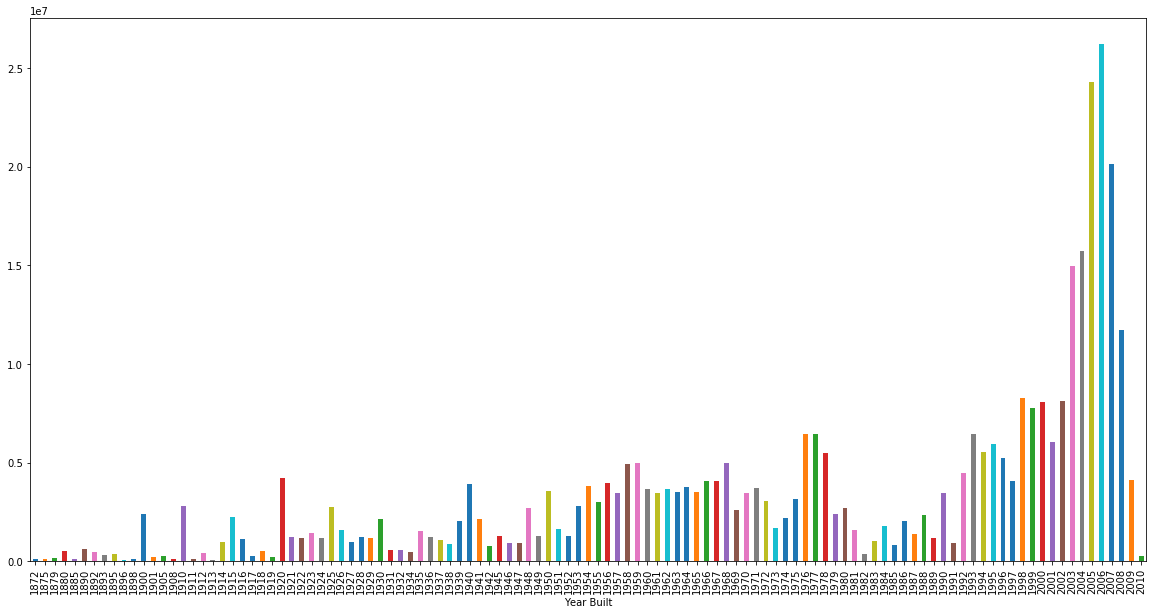

In [3]:
histogram_data.groupby("Year Built")['SalePrice'].aggregate("sum").plot(kind="bar", figsize=(20,10))

#### 2. Stacked Bar Chart

Stacked bar charts will require: 

- **data**: data source location; only csv for now
- **y_axis**: numerical data for the bar y size
- **x_axis**: either discrete numerical or categorical data (time) for the x.
- **agg**: sum form of aggregation ('sum', 'min', 'max', 'std', 'prod','var')
- **stacked**: true

Ideally, we would have the following configuration:

```yaml
# bar_chart.yaml
data: "./clean_train.csv"
y_axis: "SalePrice"
x_axis: "Year Built"
groups: "Overall Qual"
agg: "sum"
```

And then run the following command:

```bash
$ fgr chart bar_chart.yaml
```



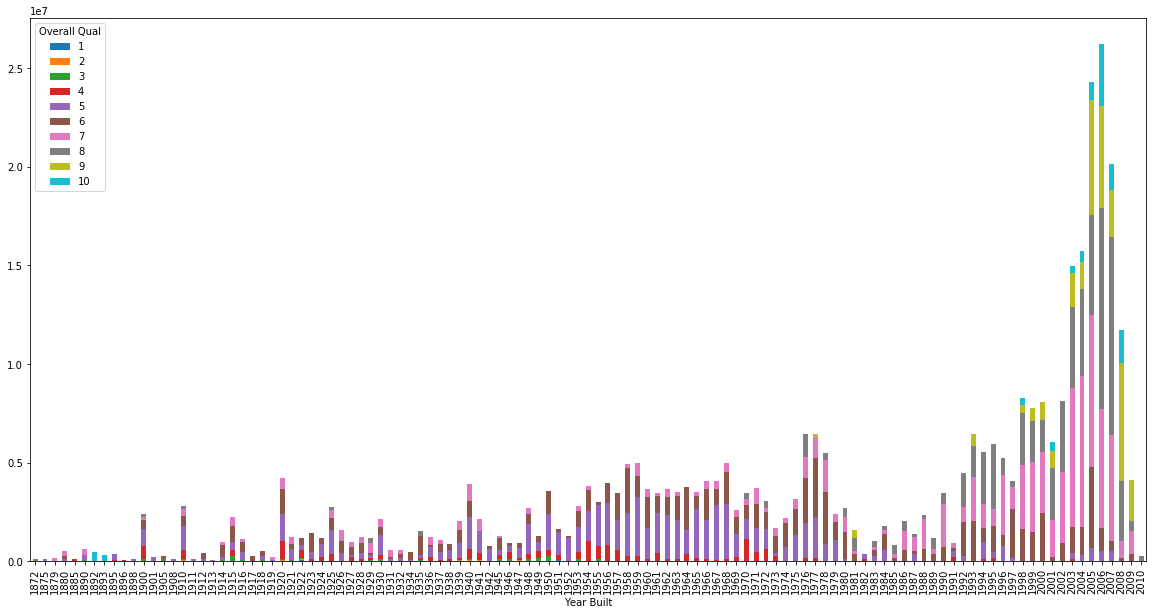

In [4]:
temp = histogram_data.groupby(['Year Built', 'Overall Qual'])[['SalePrice']].aggregate("sum")

temp.reset_index(inplace=True)

stacked_bar_chart = temp.pivot(index='Year Built', 
           columns='Overall Qual', 
           values='SalePrice').plot(kind='bar', 
                                    figsize=(20,10),
                                    stacked=True)


#### 3. Line Graphs

Under construction

#### 4. Heat Maps

Under construction

### `fgr run`

The CLI will provide [some server support for displaying the charts](#4.-Running-a-server) using the `fgr run` command.

To tie everything together, the CLI should be able to run a server.

``` bash
  $ fgr run -p 3000 -f multiple_stacked_bar_charts.yml
```

## Test Suite
Under Construction

## Next Steps

1. Figure out config and charting for line graphs and heat maps
2. Figure out config for displaying on server
3. Start figuring out spec...